In [1]:
from cosmicfishpie.fishermatrix.cosmicfish import FisherMatrix

In [2]:
#Define the observables you are interested in
observables = ['GCsp']

#Input options for CosmicFish (global options)
options = {'accuracy': 1,
           'outroot': 'LCDM+Mnu+Neff_internal_class-Euclid_3PT',
           'results_dir': 'results/',
           'derivatives': '3PT',
           'nonlinear': True,
           'feedback': 2,
           'survey_name': 'Euclid-ISTF-Superpessimistic',
           'specs_dir' : '../survey_specifications/',
           'cosmo_model' : 'LCDM',
           'code': 'class',  ## Using classy wrapper for CLASS, check that it is installed in your environment
           'class_config_yaml':'../boltzmann_yaml_files/class/fast_spectro.yaml'}

#Internally CosmicFish converts these parameters to the coresponding parameters in CAMB or CLASS 
fiducial = {"Omegam":0.32,
            "Omegab":0.05,
            "h":0.67,
            "ns":0.96,
            "sigma8":0.82,
            "mnu":0.06,
            "Neff":3.046}

spectrononlinearpars = {'sigmap_0':5.255388 ,
                        'sigmap_1':4.828736 ,
                        'sigmap_2':4.460583 ,
                        'sigmap_3':4.067725 ,
                        'sigmav_0':5.255388 ,
                        'sigmav_1':4.828736 ,
                        'sigmav_2':4.460583 ,
                        'sigmav_3':4.067725 ,
                        }  
#Parameters to be varied and analyzed and their percentage variation for numerical derivatives
freepars = {'Omegam': 0.01,
            'Omegab': 0.01,
            'mnu': 0.1,
            'Neff': 0.01,
            'h': 0.01,
            'ns': 0.01,
            'sigma8': 0.01}

In [3]:
Fishers_list = []
for survey_spec in ['Optimistic','Superpessimistic']:

    options['survey_name']= 'Euclid-ISTF-'+survey_spec
    options['outroot']= 'LCDM+Mnu+Neff_internal_class-Euclid-{:s}_3PT'.format(survey_spec)

    cosmoFM = FisherMatrix(fiducialpars=fiducial, freepars=freepars, options=options,
                      observables=observables, spectrononlinearpars=spectrononlinearpars,
                      cosmoModel=options['cosmo_model'],surveyName=options['survey_name'])

    Fishers_list.append(cosmoFM.compute())

**************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

**************************************************************
 This is the new Python version of the CosmicFish code.
**************************************************************
Custom fiducial parameters loaded

  -> Computing cosmology at the fiducial point

  ---> Cosmological functions obtained in:   2.06 s
No photo-z parameters specified. Using default: Euclid-like
No IA specified. Using default: eNLA
*** Dictionary of varied parameters in this Fisher Matrix run: 
{'Omegam': 0.01, 'Omegab': 0.01, 'mnu': 0.1, 'Neff': 0.01, 'h': 0.01, 'ns': 0.01, 'sigma8': 0.01, 'lnbgs8_1': 0.0001, 'lnbgs8_2': 0.0001, 'lnbgs8_3': 0.0001, 'lnbgs8_4': 0.0001, 'Ps_1': 0.0001, 'Ps_2': 0.0001, 'Ps_3': 0.0001, 'Ps_4': 0.0001}
                                        

2023-11-24 02:27:35,203	INFO worker.py:1673 -- Started a local Ray instance.



In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.00 s
Entering Cov gg term

In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.00 s

    Computing Pgg for ['GCsp']

In class: ComputeGalSpectro  observed P_gg computation took:   0.11 s

    Computing Pgg for ['GCsp']

In class: ComputeGalSpectro  observed P_gg computation took:   0.11 s

    Computing Pgg for ['GCsp']

In class: ComputeGalSpectro  observed P_gg computation took:   0.11 s

    Computing Pgg for ['GCsp']

In class: ComputeGalSpectro  observed P_gg computation took:   0.11 s

In class: FisherMatrix  +++ Volumes computation computed in:   0.43 s
Computing derivatives of Galaxy Clustering Spectro
>> Computing Derivs >>

  +++ Computing derivative on Omegam

In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   1.99 s

  

2023-11-24 02:28:23,869	INFO worker.py:1673 -- Started a local Ray instance.



In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.00 s
Entering Cov gg term

In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.00 s

    Computing Pgg for ['GCsp']

In class: ComputeGalSpectro  observed P_gg computation took:   0.12 s

    Computing Pgg for ['GCsp']

In class: ComputeGalSpectro  observed P_gg computation took:   0.12 s

    Computing Pgg for ['GCsp']

In class: ComputeGalSpectro  observed P_gg computation took:   0.12 s

    Computing Pgg for ['GCsp']

In class: ComputeGalSpectro  observed P_gg computation took:   0.12 s

In class: FisherMatrix  +++ Volumes computation computed in:   0.49 s
Computing derivatives of Galaxy Clustering Spectro
>> Computing Derivs >>

  +++ Computing derivative on Omegam

In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   2.29 s

  

## Plotting the Fisher matrix

In [8]:
from cosmicfishpie.analysis import fisher_matrix as fm
from cosmicfishpie.analysis import fisher_plotting as fpp

plot_options = {'fishers_list': Fishers_list[::-1], 
                'colors': ['green', 'red'],
                'fish_labels': ['Euclid Optimistic GCsp','Euclid SuperPess GCsp'][::-1],
                'plot_pars': [par for par in fiducial],
                'axis_custom_factors': {'all': 3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'Euclid-comparison_w0waCDM_GCsp'  ## file name root for all the plots, extra names can be added individually
                } 

./plots  exists already
Fisher matrix loaded, label name:  Euclid SuperPess GCsp
Fisher matrix loaded, label name:  Euclid Optimistic GCsp
---> Fisher matrix name:  Euclid SuperPess GCsp
Fisher matrix fiducials: 
 [ 0.32      0.05      0.06      3.046     0.67      0.96      0.82
  5.255388  4.828736  4.460583  4.067725  5.255388  4.828736  4.460583
  4.067725 -0.32     -0.310481 -0.306106 -0.314741  0.        0.
  0.        0.      ]
Fisher matrix 1-sigma bounds: 
 [8.07074702e-03 3.29111730e-03 2.18091837e-01 1.33205331e+00
 2.33688471e-02 3.16293641e-02 2.06769268e-02 6.46851147e-01
 6.07961742e-01 5.76391324e-01 5.44776064e-01 7.29119445e-01
 7.15104708e-01 7.37577803e-01 7.43621497e-01 3.15933596e-02
 3.18039350e-02 3.19658142e-02 3.20714489e-02 4.56331443e+01
 4.72700114e+01 4.98152404e+01 5.11234478e+01]
Fisher matrix param names: 
 ['Omegam', 'Omegab', 'mnu', 'Neff', 'h', 'ns', 'sigma8', 'sigmap_0', 'sigmap_1', 'sigmap_2', 'sigmap_3', 'sigmav_0', 'sigmav_1', 'sigmav_2', 'sigmav

/home/santiago/CosmoProjects/cosmicfish_release/cosmicfishpie/cosmicfishpie/analysis/fisher_plotting.py:240: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.savefig(
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


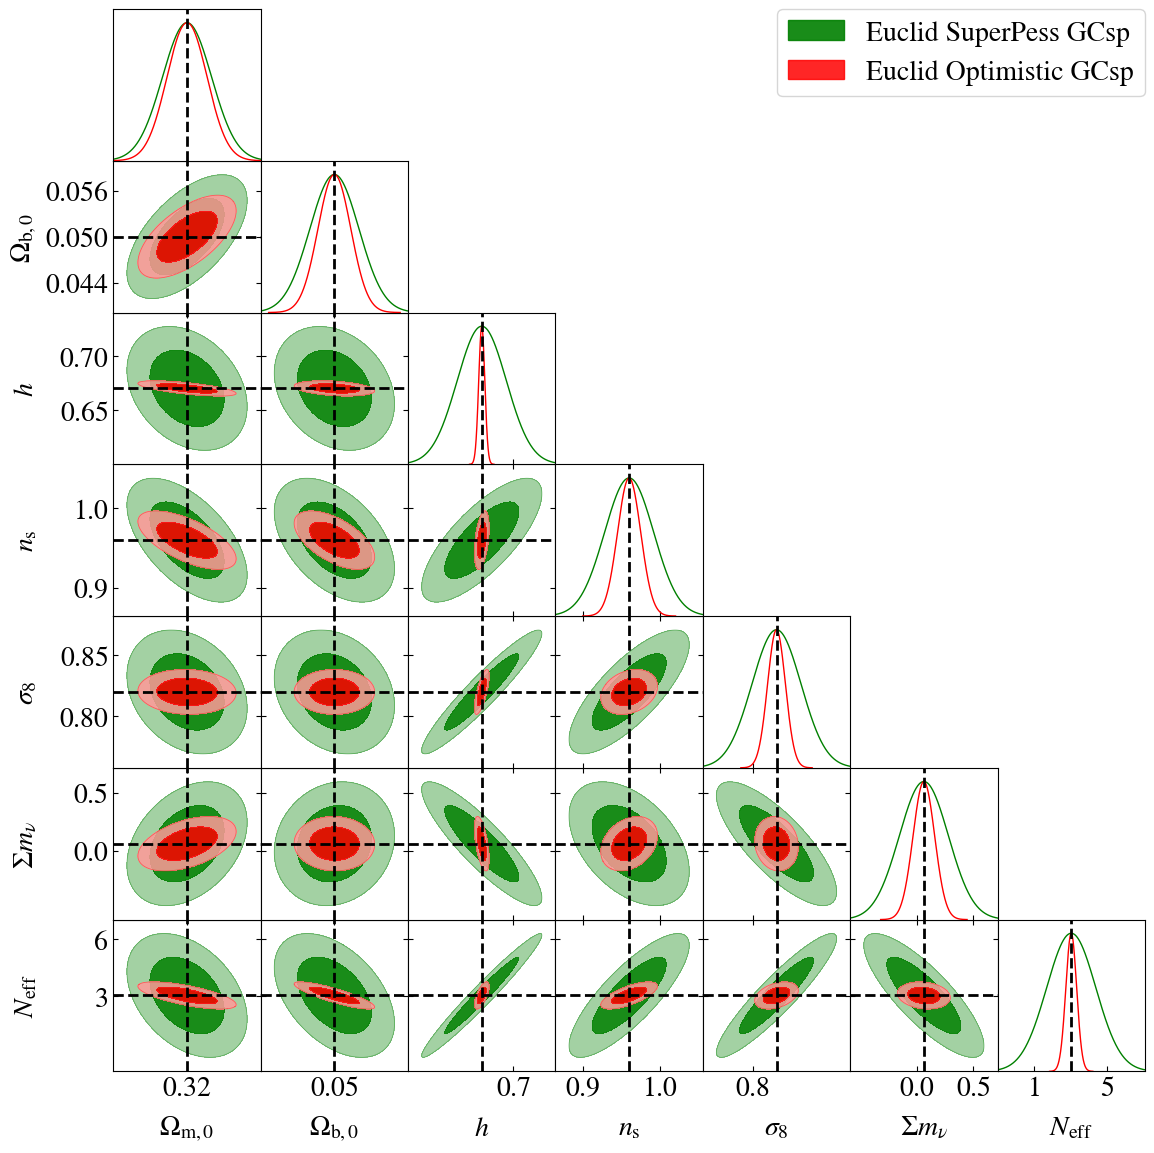

In [9]:
fish_plotter = fpp.fisher_plotting(**plot_options)
fish_plotter.plot_fisher(filled=True)